In [356]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/up-crime-data-year-2019/MR data - Compiled Data Set.csv


In [357]:
data = pd.read_csv('../input/up-crime-data-year-2019/MR data - Compiled Data Set.csv')

In [358]:
data.head()

,City,Title,Text,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,"Minor molests mute girl, sent to observation home",GHAZIABAD: A 12-year-old boy was sent to an ob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,Family out to buy car robbed of Rs 1 lakh by b...,GHAZIABAD: A family that had visited an automo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,"This gang posed as cops to extort youths, couples",GHAZIABAD: Five persons were arrested on Monda...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,"Residents object to loud music, thrashed in Gh...","Ghaziabad: Four tenants, including two soldier...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,Man kills self after being refused money for d...,GHAZIABAD: A 25-year-old allegedly committed s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [359]:
data= data.drop(['Title','Text'], axis= 1)

In [360]:
data.head()

,City,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [361]:
data.fillna(0, inplace = True)
data.shape

(466, 11)

In [362]:
data.columns = list('abcdefghijk')
data.head()

,a,b,c,d,e,f,g,h,i,j,k
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [363]:
data.tail()

,a,b,c,d,e,f,g,h,i,j,k
461,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0,0.0
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,"3,8",0.0,1.0
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0
465,Lucknow,Petty Quarrels,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [364]:
data.i[data.i == 0]= '0,0'
data.i.dtype
data[['l','m', 'n']] =  data.i.str.split(n=2,pat=",", expand = True)
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,a,b,c,d,e,f,g,h,i,j,k,l,m,n
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0,8,10,None
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,None
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,None
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,None
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,None


In [365]:
data.tail()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
461,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0,0.0,7,None,None
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,1,None,None
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,"3,8",0.0,1.0,3,8,None
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0,8,None,None
465,Lucknow,Petty Quarrels,0.0,1.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,None


In [366]:
data.fillna(0, inplace = True)
data.tail()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
461,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0,0.0,7,0,0
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,1,0,0
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,"3,8",0.0,1.0,3,8,0
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0,8,0,0
465,Lucknow,Petty Quarrels,0.0,1.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0


In [367]:
reason = np.array(data.b)
reason = reason [reason!= 0]
reason

array(['Money Disputes', 'Love Affairs', 'Unknown reasons',
       'Unknown reasons', 'Love Affairs', 'Petty Quarrels',
       'Property Disputes', 'Family Dispute', 'Money Disputes',
       'Family Dispute', 'Unknown reasons', 'Love Affairs',
       'Unknown reasons', 'Property Disputes', 'Petty Quarrels',
       'Petty Quarrels', 'Family Dispute', 'Property Disputes',
       'Unknown reasons', 'Unknown reasons', 'Petty Quarrels',
       'Petty Quarrels', 'Money Disputes', 'Personal Vendetta',
       'Family Dispute', 'Family Dispute', 'Love Affairs',
       'Unknown reasons', 'Petty Quarrels', 'Personal Vendetta',
       'Unknown reasons', 'Petty Quarrels', 'Unknown reasons',
       'Family Dispute', 'Family Dispute', 'Family Dispute',
       'Unknown reasons', 'Petty Quarrels', 'Love Affairs',
       'Love Affairs', 'Family Dispute', 'Petty Quarrels',
       'Petty Quarrels', 'Petty Quarrels', 'Property Disputes',
       'Unknown reasons', 'Unknown reasons', 'Money Disputes',
      

In [368]:
%matplotlib inline
from matplotlib import pyplot as plt

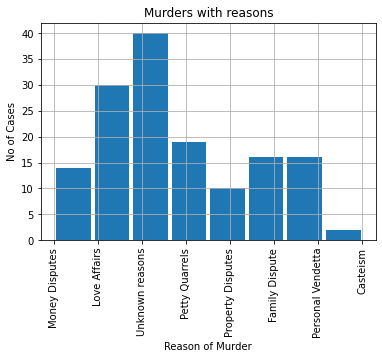

In [369]:
plt.xticks(rotation = 'vertical')
plt.xlabel('Reason of Murder')
plt.ylabel('No of Cases')
plt.title('Murders with reasons')
plt.hist(reason,bins = 8, rwidth= 0.9)
plt.grid()
#Murder Happened with reason:
#1:Property/Land Disputes,
#2:Family Dispute
#3:Petty Quarrels,
#4:Money Disputes, 
#5:Personal Vendetta, 
#6:Love Affairs, 
#7:Casteism
#8: Unknown/other

In [370]:
data.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0,8,10,0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0


In [371]:
cities = np.array(data.a)
cities

array(['Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad',
       'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaziabad', 'Ghaz

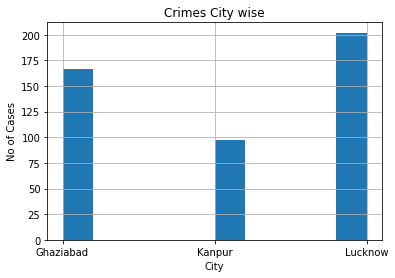

In [372]:
#plt.xticks(rotation = 'vertical')
plt.xlabel('City')
plt.ylabel('No of Cases')
plt.title('Crimes City wise')
plt.hist(cities)
plt.grid()

In [373]:
data.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0,8,10,0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0


In [374]:
num_people = data['c'] + data['d']  + data['e'] + data['f'] + data['g'] + data['h'] + data['j'] + data['k']
data['o'] = num_people
data.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0,8,10,0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0",0.0,0.0,0,0,0,0.0


In [375]:
num_people = np.array(data.o)
num_people

array([ 3.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  2.,  0.,  0.,  1.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        1.,  0.,  2.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  4.,  0.,
        0.,  0.,  1.,  2.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,
        1.,  4.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,
        1.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  2.,  1.,  1.,  1.,  0.,  1.,  1.,  1

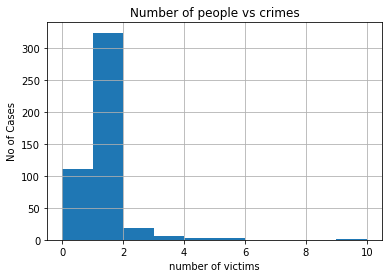

In [376]:
plt.xlabel('number of victims')
plt.ylabel('No of Cases')
plt.title('Number of people vs crimes')
plt.hist(num_people)
plt.grid()

In [377]:
crime_reason = np.array(data.l)
crime_reason = crime_reason[crime_reason != '0']
crime_reason

array(['8', '10', '9', '9', '4', '4', '7', '1', '1', '8', '3', '7', '7',
       '3', '8', '2', '7', '6', '8', '7', '8', '8', '7', '8', '1', '2',
       '2', '2', '5', '3', '8', '6', '2', '9', '8', '2', '1', '7', '7',
       '2', '2', '7', '2', '7', '5', '7', '8', '7', '2', '7', '6', '2',
       '2', '8', '6', '7', '7', '8', '8', '8', '8', '6', '11', '8', '7',
       '2', '10', '2', '8', '7', '6', '3', '3', '3', '7', '3', '5', '1',
       '7', '8', '7', '7', '7', '2', '8', '1', '7', '7', '7', '1', '2',
       '7', '8', '8', '8', '8', '7', '8', '2', '11', '11', '3', '2', '4',
       '1', '10', '1', '3', '7', '7', '7', '1', '7', '7', '7', '1', '9',
       '3', '2', '7', '1', '1', '7', '7', '8', '3', '4', '6', '8', '8',
       '8', '3', '3', '8', '3', '7', '3', '7', '3', '3', '8', '8', '6',
       '7', '3', '7', '3', '4', '8', '7', '7', '1', '8', '8', '8', '7',
       '8', '7', '7', '8', '8', '6', '8', '6', '10', '7', '8', '8', '7',
       '6', '8', '6', '6', '6', '8', '1', '8', '10', '9',

In [378]:
#data.groupby(['l','m']).size().plot(kind = "bar")
x = data['l'].astype(float)
#x.size
x = x [x != 0]
x.size

200

In [379]:
y = data['m'].astype(float)
#x.size
y = y [y != 0]
y.size

68

In [380]:
z = data['n'].astype(float)
#x.size
z = z [z != 0]
z.size

7

In [381]:
#x.size
x = x.append((y,z))
x.size

275

In [382]:
x.value_counts()
#Number of cases of crime against women vs the reason type

8.0     63
7.0     55
10.0    49
3.0     25
6.0     22
2.0     19
1.0     19
9.0     10
4.0      7
11.0     3
5.0      3
dtype: int64

<AxesSubplot:title={'center':'Crime against women'}, xlabel='Reason Type', ylabel='No of Cases'>

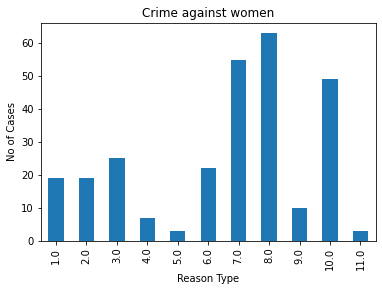

In [383]:
x.value_counts().sort_index().plot.bar(xlabel = 'Reason Type',
ylabel ='No of Cases',title = 'Crime against women')

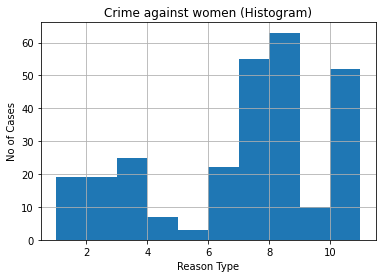

In [384]:
plt.xlabel('Reason Type')
plt.ylabel('No of Cases')
plt.title('Crime against women (Histogram)')
plt.hist(x)
plt.grid()

In [385]:
vr = data[['b','o']]



In [386]:
vr = vr [vr['b'] != 0]
vr = vr.groupby(['b']).o.sum().reset_index()

<BarContainer object of 8 artists>

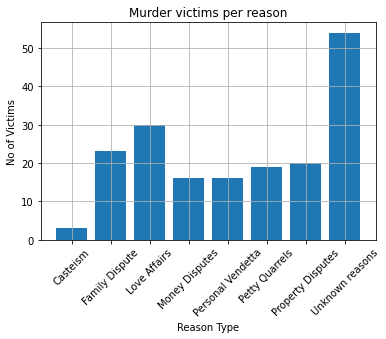

In [387]:
plt.xlabel('Reason Type')
plt.ylabel('No of Victims')
plt.title('Murder victims per reason')
plt.xticks(rotation=45)
plt.grid()
plt.bar(vr['b'],vr['o'])


In [388]:
cw1 = data[['l','o']].astype(float)
cw1 = cw1[cw1['l'] != 0]
cw2 = data[['m','o']].astype(float)
cw2 = cw2[cw2['m'] != 0]
cw3 = data[['n','o']].astype(float)
cw3 = cw3[cw3['n'] != 0]

In [390]:
cw1.append((cw2,cw3))
cw = cw1.groupby(['l']).o.sum().reset_index()
cw

,l,o
0,1.0,23.0
1,2.0,19.0
2,3.0,21.0
3,4.0,8.0
4,5.0,7.0
5,6.0,18.0
6,7.0,55.0
7,8.0,60.0
8,9.0,7.0
9,10.0,6.0


<BarContainer object of 11 artists>

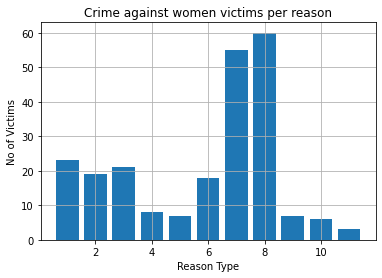

In [395]:
plt.xlabel('Reason Type')
plt.ylabel('No of Victims')
plt.title('Crime against women 
          victims per reason')
#plt.xticks(rotation=45)
plt.grid()
plt.bar(cw['l'],cw['o'])
